In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

loan_df = pd.read_csv('LoanDataset.2.csv')
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalHouseholdIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,5720,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,4576,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,6800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,4886,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,3276,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,5786,113.0,360.0,1.0,Urban
730,LP002975,Male,Yes,0,Graduate,No,4158,709,4867,115.0,360.0,1.0,Urban
731,LP002980,Male,No,0,Graduate,No,3250,1993,5243,126.0,360.0,NaN,Semiurban
732,LP002986,Male,Yes,0,Graduate,No,5000,2393,7393,158.0,360.0,1.0,Rural


In [3]:
loan_df.dropna(subset=["LoanAmount"], inplace=True)

In [4]:
# Assign X (data) and y (target)

X = loan_df[['TotalHouseholdIncome', 'Credit_History', 'Property_Area', 'Gender', 'Married', 'Education', 'Loan_Amount_Term' ]]
y = loan_df["LoanAmount"]
print(X.shape, y.shape)

(724, 7) (724,)


In [5]:
loan_df.dtypes

Loan_ID                  object
Gender                   object
Married                  object
Dependents               object
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome         int64
TotalHouseholdIncome      int64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area            object
dtype: object

In [6]:
loan_df["Property_Area"].value_counts()

Urban        276
Semiurban    228
Rural        220
Name: Property_Area, dtype: int64

In [7]:
loan_df["Gender"].value_counts()

Male      564
Female    138
Name: Gender, dtype: int64

In [8]:
loan_df["Education"].value_counts()

Graduate        558
Not Graduate    166
Name: Education, dtype: int64

In [9]:
cleanup_nums = {"Property_Area": {"Rural": 0, "Urban": 1, "Semiurban":2},
               "Gender": {"Male": 0, "Female": 1},
               "Education": {"Graduate":1, "Not Graduate": 0},
               "Married": {"Yes": 1, "No":0},
                "Self_Employed": {"Yes": 1, "No": 0},
                
               }
print(cleanup_nums)

{'Property_Area': {'Rural': 0, 'Urban': 1, 'Semiurban': 2}, 'Gender': {'Male': 0, 'Female': 1}, 'Education': {'Graduate': 1, 'Not Graduate': 0}, 'Married': {'Yes': 1, 'No': 0}, 'Self_Employed': {'Yes': 1, 'No': 0}}


In [10]:
X.fillna(0, inplace=True)

In [11]:
y.isna().sum()

0

In [12]:
X.replace(cleanup_nums, inplace=True)
X

,TotalHouseholdIncome,Credit_History,Property_Area,Gender,Married,Education,Loan_Amount_Term
0,5720,1.0,1,0,1,1,360.0
1,4576,1.0,1,0,1,1,360.0
2,6800,1.0,1,0,1,1,360.0
3,4886,0.0,1,0,1,1,360.0
4,3276,1.0,1,0,0,0,360.0
...,...,...,...,...,...,...,...
729,5786,1.0,1,0,1,0,360.0
730,4867,1.0,1,0,1,1,360.0
731,5243,0.0,2,0,0,1,360.0
732,7393,1.0,0,0,1,1,360.0


In [13]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)


In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)


In [16]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

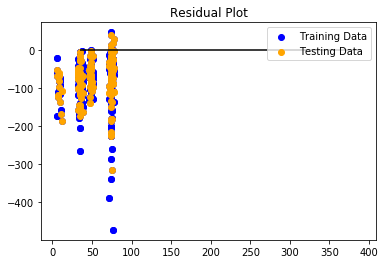

In [17]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

predictions = model.predict(X_test_scaled)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [18]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 8602.605178384732, R2: 0.05408930752809582


In [19]:
#print(model.predict(X_test_scaled))
print((y_test))

331    300.0
525    187.0
562    116.0
33     158.0
380    166.0
       ...  
307    121.0
268     49.0
399    152.0
372    152.0
207    146.0
Name: LoanAmount, Length: 181, dtype: float64


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
from scipy import stats

In [22]:
# Repeat plotting scatter and linear model for year versus murder rate

# m_slope, m_int, m_r, m_p, m_std_err = stats.linregress((ACS.iloc[:,5],ACS.iloc[:,3])
# )
# m_fit = m_slope * ACS.iloc[:,5] + m_int
# plt.scatter(ACS.iloc[:,5],ACS.iloc[:,2])
# plt.plot(ACS.iloc[:,5],m_fit,"--")
# plt.xticks(ACS.iloc[:,5], rotation=90)
# plt.xlabel('Poverty Rate %')
# plt.ylabel('Crime Rate')
# plt.show()

In [23]:
stats.pearsonr(ACS.iloc[:,5],ACS.iloc[:,2])

NameError: name 'ACS' is not defined

LoanAmount              1.000000
TotalHouseholdIncome    0.533378
ApplicantIncome         0.493451
CoapplicantIncome       0.150850
Loan_Amount_Term        0.094950
Credit_History          0.012578
Name: LoanAmount, dtype: float64


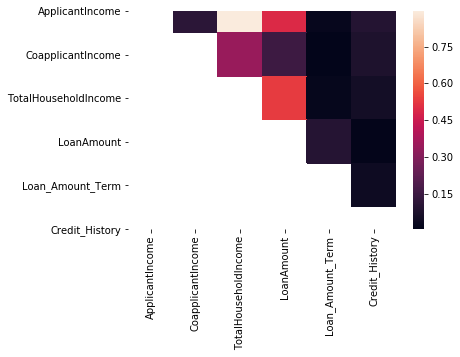

In [24]:
import seaborn as sns
corr_matrix = loan_df.corr().abs()

print(corr_matrix['LoanAmount'].sort_values(ascending=False).head(10))
# Select upper triangle of correlation matrix
matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(matrix)
plt.show;

